# Scientific Computing Pre-Traini... Quiz

*by Mycticount X*

> "Semoga kita semua dapat 100 di quiz SciComp dan dapat nilai A di Seluruh Mata Kuliah Binus"
~ Mycticount-X

## **A. Gauss Siedel**

### *Show Pseudo Code*

1. Diagonal Domiant
2. Define A, b, D, mtx, start
3. For Loop Max Iter:
    4. new = start
    5. For Loop new [i] enum (i,r)
    6. Hitung dx dan Cek Epsilon

### 🔢 **Soal Gauss-Seidel Iteration**

Diberikan sistem persamaan linear berikut:

$$
\begin{aligned}
4x + y + z &= 7 \\
x + 3y + z &= -8 \\
2x + y + 5z &= 6 \\
\end{aligned}
$$

Gunakan **metode Gauss-Seidel** untuk menyelesaikan sistem di atas dengan:

* **Tebakan awal (initial guess)**: $x_0 = 0, y_0 = 0, z_0 = 0$
* **Toleransi kesalahan**: $\varepsilon = 0.001$
* **Maksimum iterasi**: 25

---

### 📌 Pertanyaan:

1. Apakah matriks koefisien dari sistem di atas **diagonally dominant**?
2. Lakukan 5 iterasi metode Gauss-Seidel dan catat nilai $x, y, z$ di setiap iterasi.
3. Apakah iterasi sudah konvergen pada iterasi ke-5?
4. Jika tidak konvergen, lanjutkan sampai batas iterasi atau hingga syarat konvergensi tercapai.

---

In [3]:
# Test Case
A = [
    [4, 1, 1],
    [1, 3, 1],
    [2, 1, 5]
]

b = [7, -8, 6]


### **Answer Here**

In [5]:
import numpy as np

# Function
def Diagonal_Dominant (mtx):
    mtx = np.array(mtx, float)
    diag = np.abs(np.diag(mtx))
    off = np.sum(np.abs(mtx), axis=1) - diag
    return np.all(diag > off)

def Mikhail_Siedel (A, b, epsilon = 0.001, maxiter = 25):
    A = np.array(A, float)
    b = np.array(b, float)

    if not Diagonal_Dominant (A):
        print("Matrix is not Diagonally Dominant")
        return None

    D = np.diag(A)

    mtx = A.copy()
    mtx = -mtx
    np.fill_diagonal(mtx, 0)

    start = np.zeros_like(b, float)

    # Start Iter
    for k in range (maxiter):
        new = start.copy()
        for i, r in enumerate (mtx):
            new[i] = (b[i] + r @ new) / D[i]

        dx = np.linalg.norm(new - start, ord=np.inf)
        print(f"Interasi {k+1}:\n  x,y,z = {new}\n  dx = {dx}")

        if dx < epsilon:
            print("Converged")
            return new

        start = new

    print("Max Iteration reached - Not Converged")
    return None

In [7]:
# Answer Time
ans = Mikhail_Siedel(A, b)
if (ans is not None):
    print(f"Answer: {ans}")

Interasi 1:
  x,y,z = [ 1.75 -3.25  1.15]
  dx = 3.25
Interasi 2:
  x,y,z = [ 2.275      -3.80833333  1.05166667]
  dx = 0.5583333333333336
Interasi 3:
  x,y,z = [ 2.43916667 -3.83027778  0.99038889]
  dx = 0.16416666666666702
Interasi 4:
  x,y,z = [ 2.45997222 -3.81678704  0.97936852]
  dx = 0.02080555555555552
Interasi 5:
  x,y,z = [ 2.45935463 -3.81290772  0.97883969]
  dx = 0.0038793209876542
Interasi 6:
  x,y,z = [ 2.45851701 -3.81245223  0.97908364]
  dx = 0.0008376234567899488
Converged
Answer: [ 2.45851701 -3.81245223  0.97908364]


#### **Jawaban**:

1. Ya, Matriks tsb Diagonally Dominant
2. Sudah dilakukan
3. Tidak, 5 Iterasi tidak cukup untuk membuatnya Konvergen
4. Membutuhkan 6 Iterasi untuk mencapai hasil yang diinginkan

## **B. Interpolation**

### **Soal Interpolasi**

Seorang peneliti suhu lingkungan sedang melakukan pengukuran suhu udara pada berbagai ketinggian di Pegunungan Mandala. Data suhu yang berhasil dicatat pada beberapa ketinggian adalah sebagai berikut:

| Ketinggian (m) | Suhu (°C) |
| -------------- | --------- |
| 100            | 26.2      |
| 200            | 25.0      |
| 300            | 23.9      |
| 400            | 22.8      |

Peneliti ingin memperkirakan suhu di ketinggian **250 meter** menggunakan metode interpolasi.

---

### 🎯 **Pertanyaan**:

1. Gunakan metode **Interpolasi Linear** untuk memperkirakan suhu di ketinggian 250 meter.
2. Gunakan metode **Interpolasi Cubic Spline** (polinomial Newton) untuk memperkirakan suhu yang sama.
3. Bandingkan hasil interpolasi dari kedua metode. Apakah terdapat perbedaan signifikan?
4. Isi titik titik data yang kosong menggunakan kedua jenis Interpolasi


In [19]:
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d
import numpy as np

x_points = np.array([100, 200, 300, 400], dtype=float)
y_points = np.array([26.2, 30.0, 23.9, 22.8], dtype=float)
x_target = 250

### **Answer Here**

In [20]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np

LinInterpol = interp1d (x_points, y_points, kind='linear')
CsInterpol = CubicSpline (x_points, y_points)

print(f"Linear Interpolation: {LinInterpol(x_target)}")
print(f"Cubic Spline Interpolation: {CsInterpol(x_target)}")

Linear Interpolation: 26.95
Cubic Spline Interpolation: 27.25625


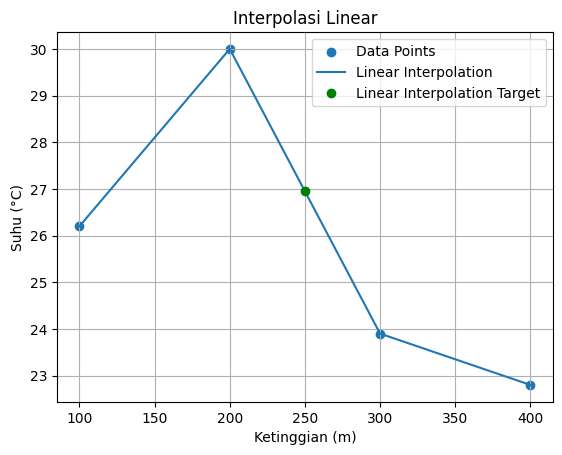

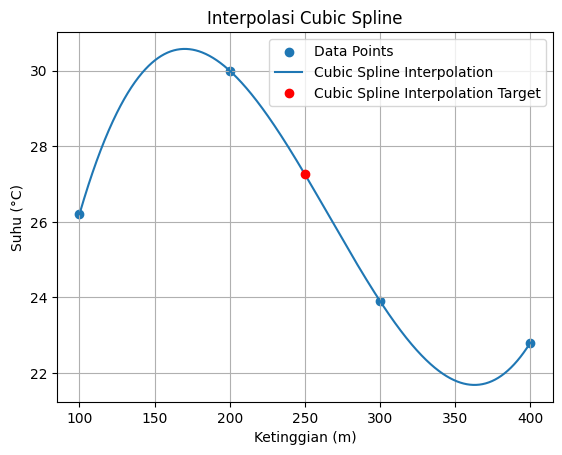

In [21]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

LinInterpol = interp1d (x_points, y_points, kind='linear')
CsInterpol = CubicSpline (x_points, y_points)

x_dense = np.linspace(x_points.min(), x_points.max(), 1000)
y_dense_lin = LinInterpol(x_dense)
y_dense_cs = CsInterpol(x_dense)

# Linear
plt.scatter(x_points, y_points, label='Data Points')
plt.plot(x_dense, y_dense_lin, label="Linear Interpolation")
plt.plot(x_target, LinInterpol(x_target), 'go', label='Linear Interpolation Target')
plt.xlabel("Ketinggian (m)")
plt.ylabel("Suhu (°C)")
plt.title("Interpolasi Linear")
plt.legend()
plt.grid(True)
plt.show()


# Cubic Spline
plt.scatter(x_points, y_points, label='Data Points')
plt.plot(x_dense, y_dense_cs, label='Cubic Spline Interpolation')
plt.plot(x_target, CsInterpol(x_target), 'ro', label='Cubic Spline Interpolation Target')
plt.xlabel('Ketinggian (m)')
plt.ylabel('Suhu (°C)')
plt.title('Interpolasi Cubic Spline')
plt.legend()
plt.grid(True)
plt.show()

## **C. Regression**

### **Regression**

Seorang peneliti lingkungan mengamati suhu udara (dalam °C) di berbagai ketinggian (dalam meter) di suatu kawasan pegunungan. Data yang diperoleh adalah sebagai berikut:

| Ketinggian (m) | Suhu (°C) |
| -------------- | --------- |
| 100            | 25        |
| 200            | 23        |
| 300            | 21        |
| 400            | 18.5      |
| 500            | 17        |
| 600            | 15        |
| 700            | 13.5      |

---

### 🎯 **Pertanyaan:**

1. Gunakan metode **Least Square Regression Linier** untuk menentukan persamaan regresi linier antara ketinggian dan suhu.

2. Berdasarkan persamaan regresi tersebut, **prediksi suhu udara** pada ketinggian:

   * 350 meter
   * 800 meter

3. **Visualisasikan hasil regresi linier** beserta titik data asli menggunakan matplotlib.

4. **Hitung nilai error total** (sum of squared error / SSE) dari model regresi tersebut terhadap data aktual.

---

### ✅ **Format Output yang Diharapkan:**

* Persamaan regresi: `y = mx + c`
* Prediksi suhu pada 350 m dan 800 m.
* Grafik dengan scatter plot data dan garis regresi.
* SSE: nilai float

---

### 💡 Petunjuk Teknis:

* Gunakan fungsi `numpy.polyfit` atau `scipy.stats.linregress`.
* Untuk SSE, gunakan:

  $$
  \text{SSE} = \sum_{i=1}^{n} (y_{\text{aktual}} - y_{\text{prediksi}})^2
  $$



In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([100, 200, 300, 400, 500, 600, 700])
y = np.array([25, 23, 21, 18.5, 17, 15, 13.5])

target = np.array([350, 800])

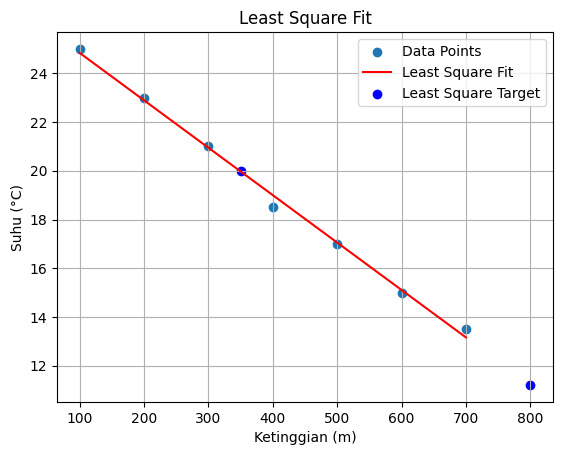

Least Square: m = -0.01946428571428576, b = 26.7857142857143
Target: [350 800], y = [19.97321429 11.21428571]


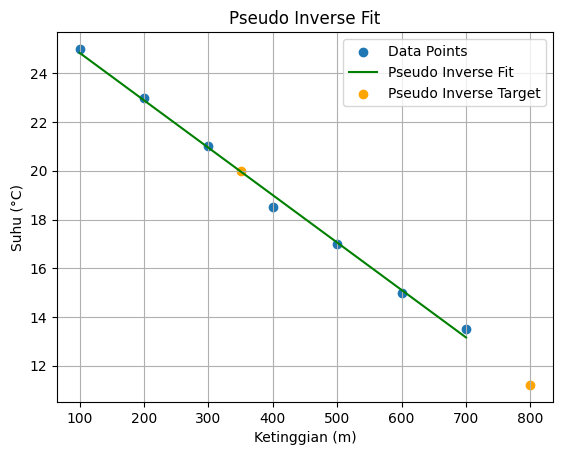

Pseudo Inverse: m = -0.01946428571428569, b = 26.78571428571428
Target: [350 800], y = [19.97321429 11.21428571]


In [8]:
def Least_Square(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    m, b = beta
    return m, b

def Pinverse(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    beta = np.linalg.pinv(X) @ y
    m, b = beta
    return m, b

m1, b1 = Least_Square(x, y)
m2, b2 = Pinverse(x, y)

yls = m1 * x + b1
ypinv = m2 * x + b2

yls_target = m1 * target + b1
ypinv_target = m2 * target + b2

plt.scatter(x, y, label='Data Points')
plt.plot(x, yls, label='Least Square Fit', color='red')
plt.scatter(target, yls_target, label='Least Square Target', color='blue')
plt.xlabel('Ketinggian (m)')
plt.ylabel('Suhu (°C)')
plt.title('Least Square Fit')
plt.legend()
plt.grid(True)
plt.show()

print(f"Least Square: m = {m1}, b = {b1}")
print(f"Target: {target}, y = {yls_target}")

plt.scatter(x, y, label='Data Points')
plt.plot(x, ypinv, label='Pseudo Inverse Fit', color='green')
plt.scatter(target, ypinv_target, label='Pseudo Inverse Target', color='orange')
plt.xlabel('Ketinggian (m)')
plt.ylabel('Suhu (°C)')
plt.title('Pseudo Inverse Fit')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pseudo Inverse: m = {m2}, b = {b2}")
print(f"Target: {target}, y = {ypinv_target}")

In [10]:
sse_ls = np.sum((y - yls) ** 2)
sse_pinv = np.sum((y - ypinv) ** 2)

print(f"SSE Least Square: {sse_ls}")
print(f"SSE Pseudo Inverse: {sse_pinv}")

SSE Least Square: 0.4196428571428555
SSE Pseudo Inverse: 0.41964285714285665


## **D. Riemann Integral**

### 📝 **Soal Riemann Integral**

**Diberikan fungsi:**

$$
f(x) = x^2 + 2x + 1
$$

Hitunglah nilai hampiran integral

$$
\int_0^4 f(x)\, dx
$$

menggunakan metode **Riemann sum** dengan pendekatan **jumlah bawah (left endpoint)** dan **jumlah atas (right endpoint)**, serta jumlah partisi $n = 40$.

In [1]:
f = lambda x: x**2 + 2*x + 1

a = 0
b = 4
n = 40

In [8]:
import numpy as np

def Mikhail_Integral (f, a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)

    leftriemann = h * np.sum(f(x[:-1]))
    rightriemann = h * np.sum(f(x[1:]))
    midriemann = h * np.sum(f((x[:-1] + x[1:]) / 2))
    trapezoid = np.sum(f(a) + 2 * (f(x[1:-1])) + f(b)) * (h / 2)

    print(f"Left Riemann    : {leftriemann:.6f}")
    print(f"Right Riemann   : {rightriemann:.6f}")
    print(f"Midpoint Riemann: {midriemann:.6f}")
    print(f"Trapezoid Model : {trapezoid:.6f}")

Mikhail_Integral (f, a, b, n)


Left Riemann    : 40.109577
Right Riemann   : 42.571115
Midpoint Riemann: 41.329827
Trapezoid Model : 90.673680


## **E. Root of Equation**

### 📘 **Soal: Penerapan Bisection dan Newton-Raphson**

Diberikan fungsi:

$$
f(x) = x^3 - 4x - 9
$$

#### **Pertanyaan:**

1. Tentukan **akar dari fungsi** tersebut di interval $[2, 3]$ menggunakan **metode Bisection** dengan toleransi kesalahan $\epsilon = 10^{-5}$.
2. Gunakan metode **Newton-Raphson** dengan tebakan awal $x_0 = 2.5$ untuk mencari akar yang sama dengan toleransi $\epsilon = 10^{-5}$.
3. Bandingkan hasil akhir dan jumlah iterasi dari kedua metode.
4. Jelaskan secara singkat kelebihan dan kekurangan kedua metode tersebut berdasarkan hasil perhitungan.

---

### 💡 **Catatan untuk Soal (Petunjuk Teknis untuk Siswa):**

* Untuk Bisection, gunakan iterasi hingga $|f(x)| < \epsilon$ atau selisih batas $|b - a| < \epsilon$.
* Untuk Newton-Raphson, gunakan rumus:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Dengan turunan dari fungsi $f(x) = x^3 - 4x - 9$ adalah:

$$
f'(x) = 3x^2 - 4
$$

---

In [18]:
def f(x):
    return x**3 - 4*x - 9

def f1(x):
    return 3*x**2 - 4

a = 2
b = 3
guess = 2.5

In [21]:
import numpy as np

def Bisection_Mikhail (f, a, b, epsilon = 1e-5, maxiter = 25):
    if (f(a) * f(b)) >= 0:
        print("Interval tidak valid")
        return None

    for _ in range (maxiter):
        c = (a + b) / 2
        if (np.abs(f(c)) < epsilon):
            print("Converged")
            return c

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    print("Max Iteration Reached! Not Converged")
    print(f"Last Iteration: {c}")
    return None

def Mikhail_Raphson (f, f1, x0, epsilon = 1e-5, maxiter=15):
    if (abs(f(x0)) < epsilon):
        print("Converged")
        return x0
    
    x1 = x0 - (f(x0) / f1(x0))

    if (maxiter <= 0):
        if (abs(f(x1)) < epsilon):
            print("Converged")
            return x1
        print("Max Iteration Reached! Not Converged")
        print(f"Last Iteration: {x1}")
        return None
    else:
        return Mikhail_Raphson (f, f1, x1, epsilon, maxiter = maxiter - 1)


roota = Bisection_Mikhail(f, a, b)
if (roota is not None):
    print(f"Root (Bisection): {roota}")

rootb = Mikhail_Raphson(f, f1, guess)
if (rootb is not None):
    print(f"Root (Newton Raphson): {rootb}")



Converged
Root (Bisection): 2.7065277099609375
Converged
Root (Newton Raphson): 2.7065279765747587
